In [1]:
import pandas as pd
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.shape

(8555, 3)

In [3]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [4]:
from sklearn import preprocessing

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [7]:
df['Gender'].unique()

array([1, 0])

In [8]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

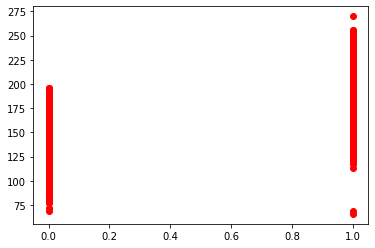

In [10]:
plt.scatter(df['Gender'],df['Weight'],color='red')

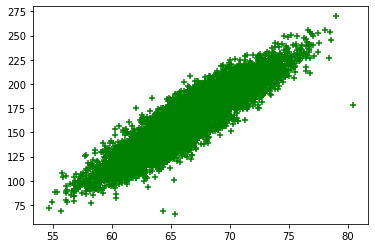

In [11]:
plt.scatter(df['Height'],df['Weight'],color='green',marker='+')

In [12]:
X = df[['Gender','Height']]
y = df['Weight']

In [13]:
X

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [14]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [17]:
len(X_train)

5988

In [18]:
len(X_test)

2567

In [19]:
X_train

,Gender,Height
2842,1,67.356598
8537,0,65.654134
1139,1,66.822763
3680,1,69.757007
2680,1,65.522389
...,...,...
7151,0,63.587638
1992,1,72.089899
7848,0,60.415846
1700,1,71.657660


In [20]:
X_test

,Gender,Height
8460,0,65.046997
3358,1,71.304176
4796,1,67.495260
157,1,61.937323
1983,1,70.465663
...,...,...
8335,0,60.081007
444,1,67.906850
4962,1,70.144763
2837,1,68.054450


In [21]:
y_train

2842    181.372971
8537    138.104340
1139    166.171185
3680    181.155093
2680    175.571313
           ...    
7151    117.440811
1992    210.125959
7848    126.703963
1700    204.426256
5404    125.775812
Name: Weight, Length: 5988, dtype: float64

In [22]:
y_test

8460    140.823229
3358    192.847099
4796    165.250264
157     147.263687
1983    182.802806
           ...    
8335    123.776018
444     170.417231
4962    194.831396
2837    177.031907
1458    179.828344
Name: Weight, Length: 2567, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [24]:
clf.fit(X_train, y_train)

LinearRegression()

In [25]:
X_test

,Gender,Height
8460,0,65.046997
3358,1,71.304176
4796,1,67.495260
157,1,61.937323
1983,1,70.465663
...,...,...
8335,0,60.081007
444,1,67.906850
4962,1,70.144763
2837,1,68.054450


In [26]:
clf.predict(X_test)

array([143.57405269, 200.61168139, 177.91587072, ..., 193.7032019 ,
       181.24785932, 183.3951635 ])

In [27]:
p_value = clf.predict(X_test)

In [28]:
print(p_value)

[143.57405269 200.61168139 177.91587072 ... 193.7032019  181.24785932
 183.3951635 ]


In [29]:
y_test

8460    140.823229
3358    192.847099
4796    165.250264
157     147.263687
1983    182.802806
           ...    
8335    123.776018
444     170.417231
4962    194.831396
2837    177.031907
1458    179.828344
Name: Weight, Length: 2567, dtype: float64

In [30]:
clf.score(X_test,y_test)

0.9051673894885222

## So Accuracy is 90%

In [31]:
#slope
m = clf.coef_

#intercept
c = clf.intercept_

In [32]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,p_value)

In [33]:
print(MAE)  #The Result of MAE

7.786660683668618


In [34]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,p_value)

In [35]:
print(MSE) #The Result of MSE

96.05350693154467


## Accuracy = 90%, MAE = 7.8,  MSE = 97.56

## Using K-NN Algorithm

In [36]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [37]:
df.Gender.unique()

array([1, 0])

In [38]:
df.Gender =  df.Gender.replace([1,0],['Male','Female'])

In [39]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [40]:
df1 = df.copy()

In [41]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [42]:
df1.shape

(8555, 3)

In [43]:
X = df1[['Weight','Height']]

In [44]:
y = df1['Gender']

In [45]:
y =df.Gender.replace(['Male','Female'],[1,0])
y

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int64

In [46]:
X = pd.get_dummies(X)
X

,Weight,Height
0,241.893563,73.847017
1,162.310473,68.781904
2,212.740856,74.110105
3,220.042470,71.730978
4,206.349801,69.881796
...,...,...
8550,110.565497,60.483946
8551,129.921671,63.423372
8552,155.942671,65.584057
8553,151.678405,67.429971


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#import matplotlib.pyplot as plt
KNN = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski',n_jobs=-1)

KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [50]:
Y_pred = KNN.predict(X_test)

In [51]:
Y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [52]:
KNN.score(X_test,y_test)

0.9092325671990651

## Accuracy is 91%

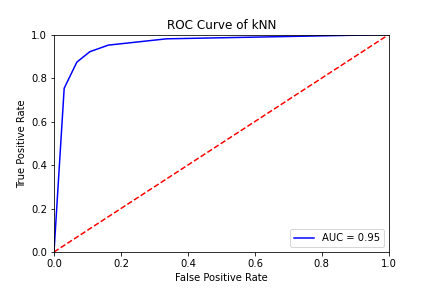

<Figure size 432x288 with 0 Axes>

In [53]:
y_scores = KNN.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[::, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [54]:
from sklearn.metrics import classification_report, confusion_matrix


In [55]:
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1085
           1       0.92      0.92      0.92      1482

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

[[ 969  116]
 [ 117 1365]]
